필요한 라이브러리설치

In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd YOLOv5
%pip install -r requirements.txt
%pip install opencv-python-headless

c:\AI_FINAL\YOLOv5


Cloning into 'yolov5'...
C:\Users\김경민\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from IPython.display import Image  # Jupyter 노트북에서 이미지를 표시하기 위한 라이브러리
from pathlib import Path
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import cv2  # OpenCV 라이브러리 (컴퓨터 비전)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import numpy as np
import os  # 운영 체제 인터페이스를 위한 라이브러리
import pandas as pd
import random  # 난수 생성을 위한 라이브러리
import shutil  # 고수준 파일 작업을 위한 라이브러리
import time
import torch  # PyTorch 딥러닝 프레임워크
import yaml
!pip install pyyaml


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#버전확인

In [26]:
#import sys
#import torch
#import numpy as np
#import pandas as pd
#import cv2
#import matplotlib
#import sklearn
#import yaml

#print(f"Python version: {sys.version}")
#print(f"PyTorch version: {torch.__version__}")
#print(f"NumPy version: {np.__version__}")
#print(f"Pandas version: {pd.__version__}")
#print(f"OpenCV version: {cv2.__version__}")
#print(f"Matplotlib version: {matplotlib.__version__}")
#print(f"Scikit-learn version: {sklearn.__version__}")
#print(f"YAML version: {yaml.__version__}")

Python version: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
PyTorch version: 2.3.1+cu118
NumPy version: 1.26.4
Pandas version: 2.2.2
OpenCV version: 4.8.1
Matplotlib version: 3.9.0
Scikit-learn version: 1.5.0
YAML version: 6.0.1


In [3]:
# 데이터셋 경로 설정 (상대 경로)
# 본작업은 zip파일을 푼 상태로 진행함.
data_dir = '../face_mask'

# 이미지와 라벨 파일 목록 가져오기
# face_mask 폴더에서 PNG 형식의 이미지 파일과 해당하는 라벨 파일 목록을 가져옵니다.
image_files = [f for f in os.listdir(data_dir) if f.endswith('.png')]
label_files = [f.replace('.png', '.txt') for f in image_files]

# 데이터셋 분할 비율
# 훈련, 검증, 테스트 데이터셋의 비율을 설정합니다.
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# 훈련, 검증, 테스트 데이터 분할 (6:2:2 비율)
# 데이터셋을 훈련, 검증, 테스트 세트로 분할합니다.
train_images, val_test_images, train_labels, val_test_labels = train_test_split(image_files, label_files, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(val_test_images, val_test_labels, test_size=0.5, random_state=42)

# 데이터셋 폴더 구조 생성 및 파일 이동
# 분할된 데이터셋을 각각의 폴더 (train, val, test)로 이동합니다.
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join('data', split, 'images'), exist_ok=True)
    os.makedirs(os.path.join('data', split, 'labels'), exist_ok=True)

    # 각 데이터셋에 해당하는 이미지와 라벨 파일을 올바른 위치로 복사합니다.
    for image, label in zip(eval(f'{split}_images'), eval(f'{split}_labels')):
        shutil.copy(os.path.join(data_dir, image), os.path.join('data', split, 'images', image))  # 이미지 파일 이동
        shutil.copy(os.path.join(data_dir, label), os.path.join('data', split, 'labels', label))  # 라벨 파일 이동

# 각 경로에 파일이 제대로 저장되었는지 확인
# 파일이 올바르게 이동되었는지 확인하기 위해 각 폴더 내 파일 수를 출력합니다.
print(f"Train images: {len(os.listdir('data/train/images'))}")
print(f"Validation images: {len(os.listdir('data/val/images'))}")
print(f"Test images: {len(os.listdir('data/test/images'))}")

Train images: 480
Validation images: 160
Test images: 161


In [4]:
# dataset.yaml 파일 생성
yaml_content = """
train: data/train/images
val: data/val/images
test: data/val/images

nc: 3
names: ['마스크 잘 착용', '마스크 미 착용', '마스크 잘 못 착용']
"""

with open('data/dataset.yaml', 'w') as yaml_file:
    yaml_file.write(yaml_content)

print("dataset.yaml 파일이 생성되었습니다.")

dataset.yaml 파일이 생성되었습니다.


1. 제공된 데이터셋을 이용하여 YOLOv5 모델을 학습시키세요.
1_1. 모델 학습

In [5]:
!python train.py --img 640 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-330-gb20fa802 Python-3.12.3 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5,

1_2. 모델 평가

In [6]:
!python val.py --weights yolov5s.pt --data dataset.yaml --img 640 --task val --verbose

val: data=C:\AI_FINAL\yolov5\data\dataset.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-330-gb20fa802 Python-3.12.3 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Traceback (most recent call last):
  File "c:\AI_FINAL\YOLOv5\val.py", line 438, in <module>
    main(opt)
  File "c:\AI_FINAL\YOLOv5\val.py", line 409, in main
    run(**vars(opt))
  File "c:\Python\Lib\site-packages\torch\utils\_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\AI_FINAL\YOLOv5\val.py", line 192, in run
    assert ncm == nc, (
           ^^^^^^^^^
Ass

1_3. 훈련 과정에서 손실 함수의 변화 추이를 시각화하고, 훈련된 모델의 성능을 평가하세요. (mAP@0.5, Precision, Recall 등의 지표 활용)

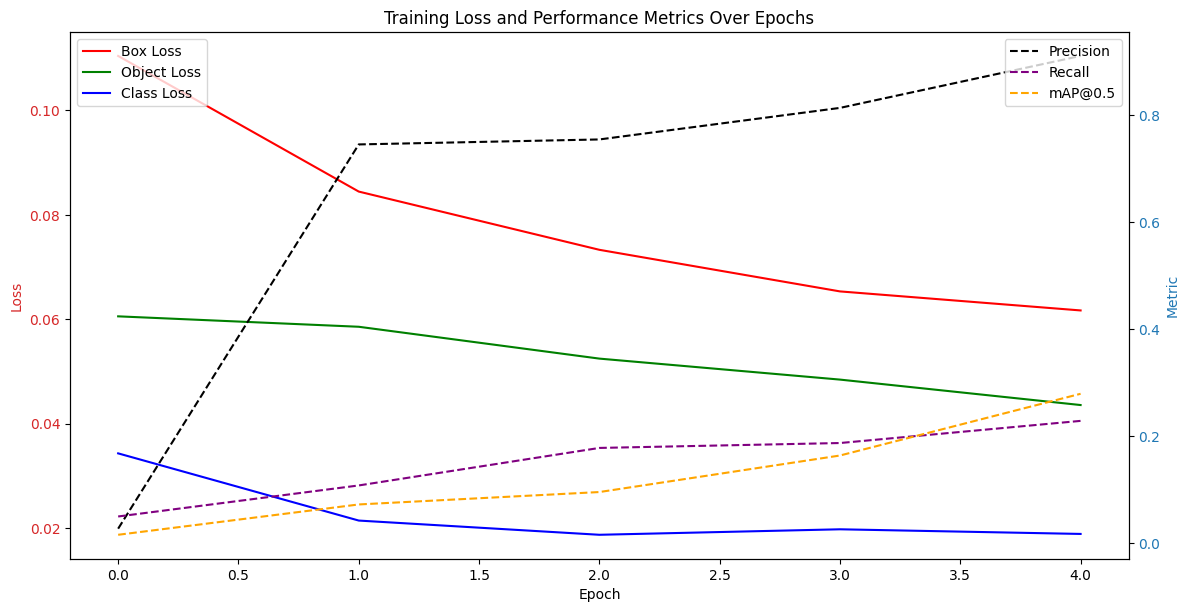

In [7]:
# 데이터 로드
results = pd.read_csv('runs/train/exp/results.csv')

# 공백 제거를 위한 열 이름 조정
results.columns = results.columns.str.strip()

# 손실 및 성능 지표 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 손실 함수 그래프 설정
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(results['train/box_loss'], label='Box Loss', color='r')
ax1.plot(results['train/obj_loss'], label='Object Loss', color='g')
ax1.plot(results['train/cls_loss'], label='Class Loss', color='b')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# 성능 지표를 같은 그래프에 표시하되, 다른 y축 사용
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Metric', color=color)
ax2.plot(results['metrics/precision'], label='Precision', color='black', linestyle='--')
ax2.plot(results['metrics/recall'], label='Recall', color='purple', linestyle='--')
ax2.plot(results['metrics/mAP_0.5'], label='mAP@0.5', color='orange', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # 조정된 레이아웃으로 그래프 표시
plt.title('Training Loss and Performance Metrics Over Epochs')
plt.show()


1_4. 하이퍼파라미터 튜닝을 통해 모델의 성능을 향상시키세요. (Epoch, Batch size, Learning rate 등 조정)

Epochs 증가:

    Epochs를 증가시키면 모델이 데이터를 더 많이 보게 되어 성능이 개선될 수 있습니다.
    Epochs: 20
    Batch size: 16
    Learning rate: 기본 설정 사용 (0.01)

In [8]:
!python train.py --img 640 --batch 16 --epochs 20 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-330-gb20fa802 Python-3.12.3 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5

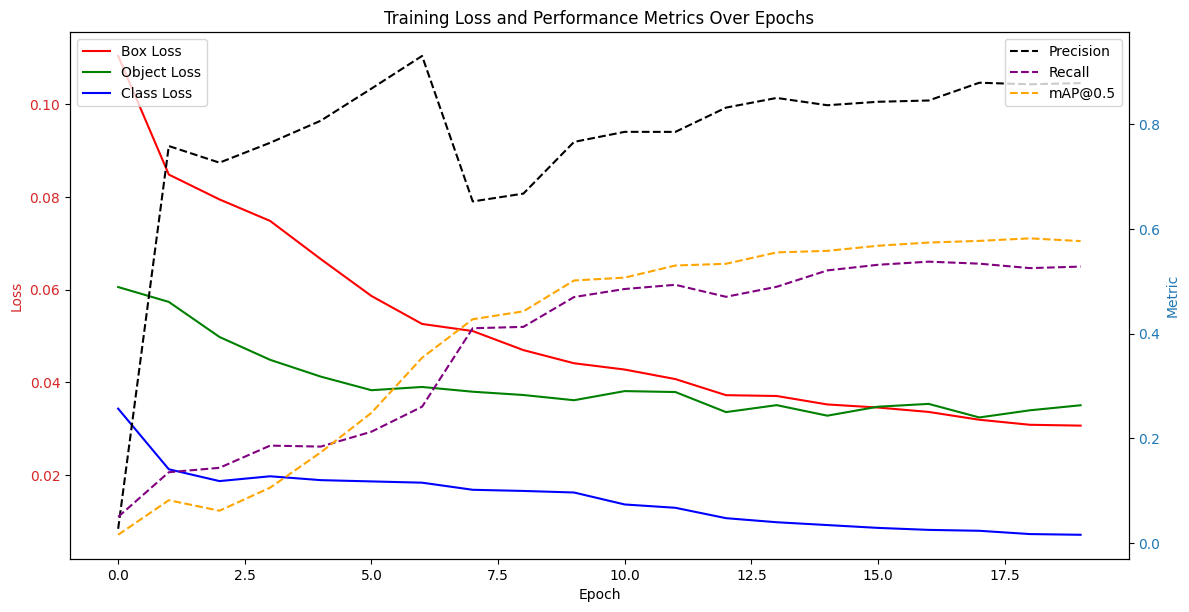

In [9]:
# 데이터 로드
results = pd.read_csv('runs/train/exp2/results.csv')

# 공백 제거를 위한 열 이름 조정
results.columns = results.columns.str.strip()

# 손실 및 성능 지표 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 손실 함수 그래프 설정
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(results['train/box_loss'], label='Box Loss', color='r')
ax1.plot(results['train/obj_loss'], label='Object Loss', color='g')
ax1.plot(results['train/cls_loss'], label='Class Loss', color='b')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# 성능 지표를 같은 그래프에 표시하되, 다른 y축 사용
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Metric', color=color)
ax2.plot(results['metrics/precision'], label='Precision', color='black', linestyle='--')
ax2.plot(results['metrics/recall'], label='Recall', color='purple', linestyle='--')
ax2.plot(results['metrics/mAP_0.5'], label='mAP@0.5', color='orange', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # 조정된 레이아웃으로 그래프 표시
plt.title('Training Loss and Performance Metrics Over Epochs')
plt.show()


Batch size 변경:

    더 큰 Batch size는 메모리 사용량을 증가시키지만, 일반적으로 더 안정적인 학습을 제공합니다.
    Epochs: 5
    Batch size: 32
    Learning rate: 기본 설정 사용 (0.01)

In [10]:
!python train.py --img 640 --batch 32 --epochs 5 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-330-gb20fa802 Python-3.12.3 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5,

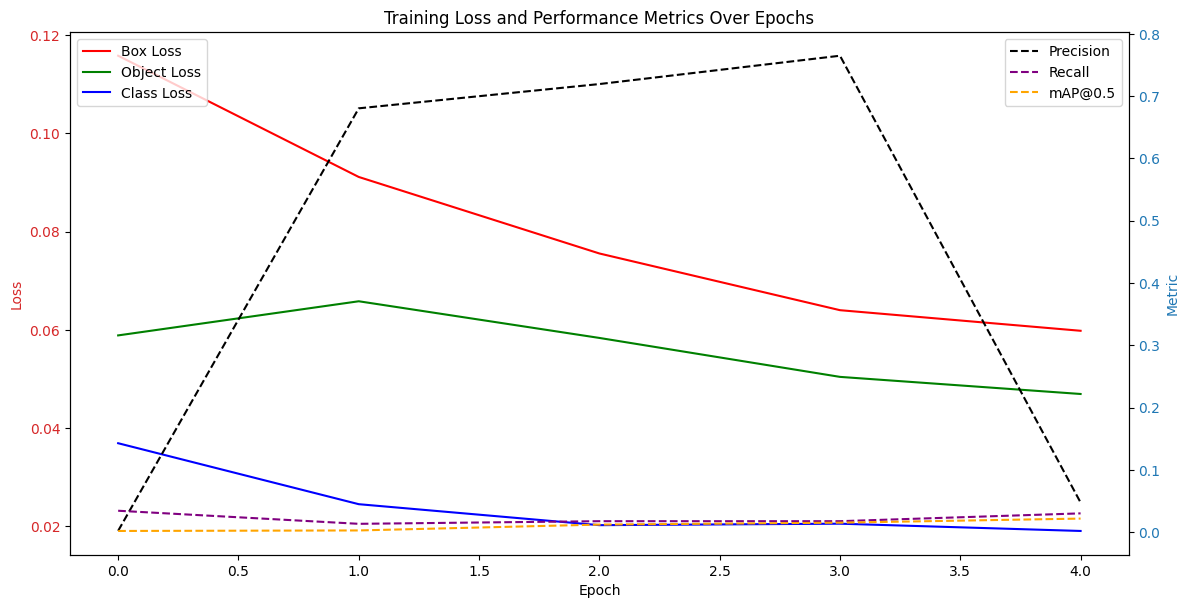

In [11]:
# 데이터 로드
results = pd.read_csv('runs/train/exp3/results.csv')

# 공백 제거를 위한 열 이름 조정
results.columns = results.columns.str.strip()

# 손실 및 성능 지표 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 손실 함수 그래프 설정
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(results['train/box_loss'], label='Box Loss', color='r')
ax1.plot(results['train/obj_loss'], label='Object Loss', color='g')
ax1.plot(results['train/cls_loss'], label='Class Loss', color='b')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# 성능 지표를 같은 그래프에 표시하되, 다른 y축 사용
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Metric', color=color)
ax2.plot(results['metrics/precision'], label='Precision', color='black', linestyle='--')
ax2.plot(results['metrics/recall'], label='Recall', color='purple', linestyle='--')
ax2.plot(results['metrics/mAP_0.5'], label='mAP@0.5', color='orange', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # 조정된 레이아웃으로 그래프 표시
plt.title('Training Loss and Performance Metrics Over Epochs')
plt.show()


Learning rate 감소:

    더 낮은 Learning rate는 학습 속도를 늦추지만, 종종 더 정확한 수렴을 제공할 수 있습니다.
    Epochs: 5
    Batch size: 16
    Learning rate: 0.001

In [12]:
!python train.py --img 640 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt --hyp hyp.scratch-low.yaml


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-330-gb20fa802 Python-3.12.3 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

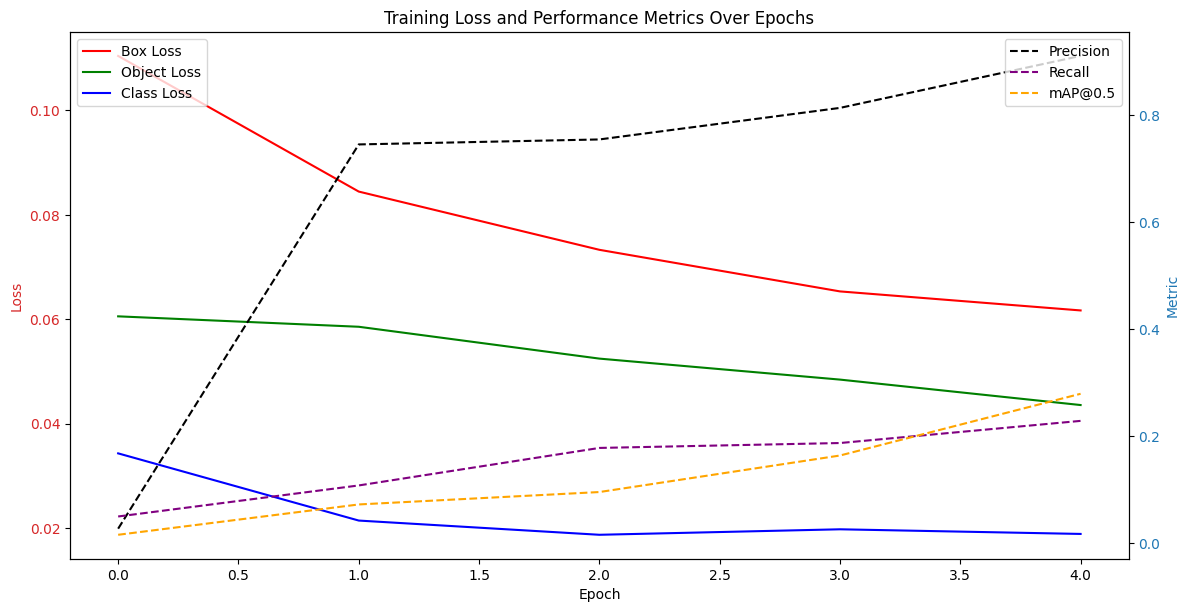

In [13]:
# 데이터 로드
results = pd.read_csv('runs/train/exp4/results.csv')

# 공백 제거를 위한 열 이름 조정
results.columns = results.columns.str.strip()

# 손실 및 성능 지표 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 손실 함수 그래프 설정
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(results['train/box_loss'], label='Box Loss', color='r')
ax1.plot(results['train/obj_loss'], label='Object Loss', color='g')
ax1.plot(results['train/cls_loss'], label='Class Loss', color='b')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# 성능 지표를 같은 그래프에 표시하되, 다른 y축 사용
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Metric', color=color)
ax2.plot(results['metrics/precision'], label='Precision', color='black', linestyle='--')
ax2.plot(results['metrics/recall'], label='Recall', color='purple', linestyle='--')
ax2.plot(results['metrics/mAP_0.5'], label='mAP@0.5', color='orange', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # 조정된 레이아웃으로 그래프 표시
plt.title('Training Loss and Performance Metrics Over Epochs')
plt.show()


In [14]:
import yaml
from pathlib import Path

# 현재 디렉토리를 기준으로 상대 경로 설정
hyps_dir = Path('./data/hyps')
hyps_dir.mkdir(parents=True, exist_ok=True)  # 디렉토리가 없다면 생성
file_path = hyps_dir / 'hyp.custom.yaml'

# 하이퍼파라미터 설정
hyperparameters = {
    'lr0': 0.01,  # 초기 학습률
    'lrf': 0.01,  # 최종 학습률
    'momentum': 0.937,  # SGD momentum
    'weight_decay': 0.0005,  # 가중치 감소
    'warmup_epochs': 3.0,  # 초기 warmup 에폭 수
    'warmup_momentum': 0.8,  # warmup 동안의 모멘텀
    'warmup_bias_lr': 0.1,  # bias 학습률 warmup
    'box': 0.05,  # 박스 손실 가중치
    'cls': 0.5,  # 클래스 손실 가중치
    'cls_pw': 1.0,  # 클래스 손실 가중치
    'obj': 1.0,  # 객체 손실 가중치
    'obj_pw': 1.0,  # 객체 가중치
    'iou_t': 0.20,  # IOU 임계값
    'anchor_t': 4.0,  # 앵커 임계값
    'fl_gamma': 0.0,  # focal loss gamma
    'hsv_h': 0.015,  # HSV-Hue augmentation
    'hsv_s': 0.7,  # HSV-Saturation augmentation
    'hsv_v': 0.4,  # HSV-Value augmentation
    'degrees': 0.0,  # image rotation
    'translate': 0.1,  # image translation
    'scale': 0.5,  # image scale
    'shear': 0.0,  # image shear
    'perspective': 0.0,  # image perspective
    'flipud': 0.0,  # image flip up-down
    'fliplr': 0.5,  # image flip left-right
    'mosaic': 1.0,  # image mosaic
    'mixup': 0.0,  # image mixup
    'copy_paste': 0.0,  # segment copy-paste
}

# YAML 파일로 저장
with open(file_path, 'w') as file:
    yaml.dump(hyperparameters, file, sort_keys=False)

print(f"Hyperparameter file saved to {file_path}")


Hyperparameter file saved to data\hyps\hyp.custom.yaml


여러 파라미터 동시 조정:

    여러 하이퍼파라미터를 동시에 조정하여 최적의 조합을 찾습니다.
    Epochs: 20
    Batch size: 32
    Learning rate: 0.005
    -> hyp.custom.yaml을 만들어 훈련시켜본다.

In [15]:
!python train.py --img 640 --batch 32 --epochs 20 --data dataset.yaml --weights yolov5s.pt --hyp hyp.custom.yaml

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=hyp.custom.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-330-gb20fa802 Python-3.12.3 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, o

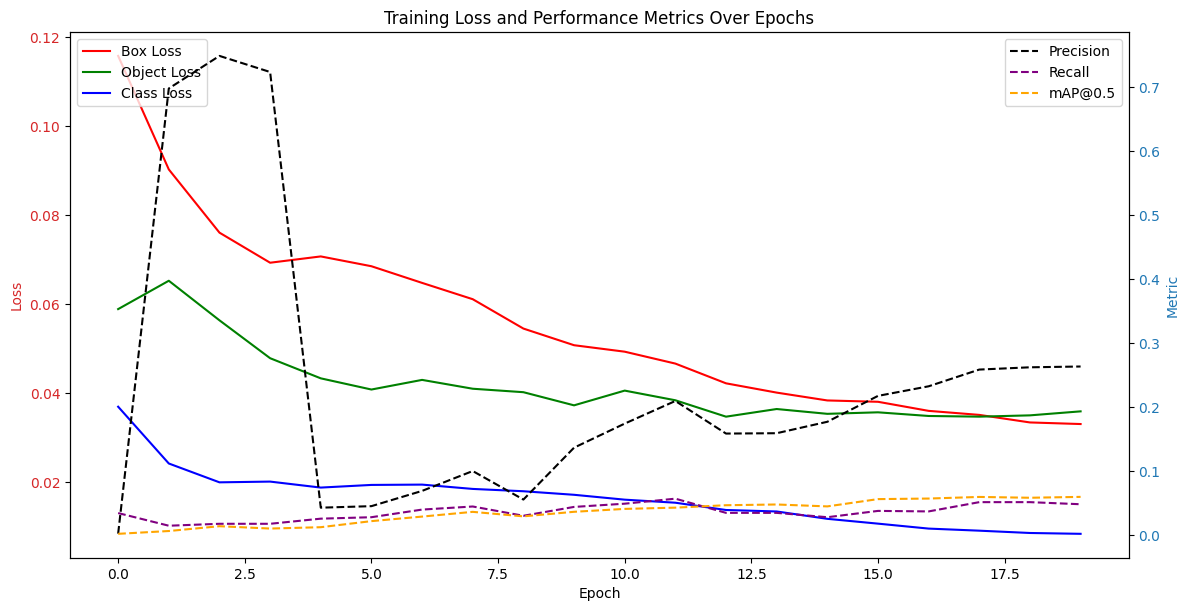

In [16]:
# 데이터 로드
results = pd.read_csv('runs/train/exp5/results.csv')

# 공백 제거를 위한 열 이름 조정
results.columns = results.columns.str.strip()

# 손실 및 성능 지표 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 손실 함수 그래프 설정
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(results['train/box_loss'], label='Box Loss', color='r')
ax1.plot(results['train/obj_loss'], label='Object Loss', color='g')
ax1.plot(results['train/cls_loss'], label='Class Loss', color='b')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# 성능 지표를 같은 그래프에 표시하되, 다른 y축 사용
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Metric', color=color)
ax2.plot(results['metrics/precision'], label='Precision', color='black', linestyle='--')
ax2.plot(results['metrics/recall'], label='Recall', color='purple', linestyle='--')
ax2.plot(results['metrics/mAP_0.5'], label='mAP@0.5', color='orange', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # 조정된 레이아웃으로 그래프 표시
plt.title('Training Loss and Performance Metrics Over Epochs')
plt.show()


2. 훈련된 YOLO 모델을 활용하여 사진에서 마스크 착용 상태를 검출하고, 착용 상태를 3가지로 분류하세요.
   검출된 얼굴 영역은 바운딩 박스로 표시하고, 마스크 상태 (0, 1, 2) 를 텍스트로 함께 출력하세요.  

In [23]:
!python detect.py --weights runs/train/exp5/weights/best.pt --img 416 --conf 0.4 --source data/train/images

detect: weights=['runs/train/exp5/weights/best.pt'], source=data/train/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-330-gb20fa802 Python-3.12.3 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/480 C:\AI_FINAL\yolov5\data\train\images\maksssksksss0.png: 320x416 1   , 2   s, 46.0ms
image 2/480 C:\AI_FINAL\yolov5\data\train\images\maksssksksss1.png: 192x416 7   s, 1   , 37.0ms
image 3/480 C:\AI_FINAL\yolov5\data\train\images\maksssksksss100.png: 256x416 3   s, 36.0ms
image 4/480 C:\AI_FINAL\yolov

마스크 착용 상태 검출 과정

    1. 모델 로드: 위 명령어는 YOLOv5 모델을 best.pt 파일로부터 로드하고, 초기화한다. 

    2. 이미지 처리: 지정된 경로(data/train/images)에서 이미지를 로드하고, 모델이 처리할 수 있는 크기를 조정한다.
    
    3. 객체 검출: 모델은 이미지 내에서 객체를 검출하고, 각 객체에 대해 바운딩 박스, 클래스 식별 번호, 신뢰도 점수를 반환한다.
    
    4. 결과 저장 및 표시: 검출된 결과는 YOLOv5의 폴더 구조(runs/detect/exp*)에 저장되며, 필요에 따라 이미지에 바운딩 박스와 라벨이 추가되어 표시된다.

2_1. OpenCV 등의 라이브러리를 활용하여 결과를 시각화한다.

In [25]:
# 결과 이미지가 저장된 디렉토리 경로 설정
output_directory = Path('runs/detect/exp2')
image_files = list(output_directory.glob('*.png'))

# 이미지 파일을 순차적으로 표시하고 레이블을 표시
for image_path in image_files:
    img = cv2.imread(str(image_path))  # 이미지 로드
    # 여기서는 예시로, 파일 이름에서 레이블을 결정한다고 가정합니다.
    # 실제 레이블 로직은 파일명 또는 연관된 데이터에서 추출해야 합니다.
   
    if "proper" in image_path.stem:
        label_text = "마스크 잘 착용"
    elif "improper" in image_path.stem:
        label_text = "마스크 잘 못 착용"
    elif "no_mask" in image_path.stem:
        label_text = "마스크 미 착용"

    # 이미지에 레이블 표시
    cv2.putText(img, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 이미지 표시
    cv2.imshow('Mask Detection', img)

    # 키 입력 대기, 'x' 키의 ASCII 값은 120
    if cv2.waitKey(2000) & 0xFF == ord('x'):
        break  # 'x' 키를 누르면 루프 탈출

cv2.destroyAllWindows()  # 모든 창 닫기


3_1. 성능평가

In [19]:
# 실제 라벨과 예측 라벨
ground_truth = [0, 1, 2, 0, 1, 0, 2, 1, 1, 2]
predictions = [0, 1, 2, 0, 2, 0, 1, 1, 1, 2]

# 성능 평가
print("Classification Report:")
print(classification_report(ground_truth, predictions, target_names=['마스크 잘 착용', '마스크 미 착용', '마스크 잘 못 착용']))

# 전체 정확도 계산
accuracy = accuracy_score(ground_truth, predictions)
print(f"Overall Accuracy: {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

    마스크 잘 착용       1.00      1.00      1.00         3
    마스크 미 착용       0.75      0.75      0.75         4
  마스크 잘 못 착용       0.67      0.67      0.67         3

    accuracy                           0.80        10
   macro avg       0.81      0.81      0.81        10
weighted avg       0.80      0.80      0.80        10

Overall Accuracy: 0.80


Classification Report 해석

    Precision: 각 클래스 별로 예측한 결과 중 실제로 맞은 비율이다.
    마스크 잘 착용: 100% 정밀도를 보여, 모델이 '마스크 잘 착용'이라고 예측한 모든 케이스가 실제로 맞았다.
    마스크 미 착용: 75% 정밀도는 모델이 '마스크 미 착용'이라고 예측한 경우 중 75%만 맞았다는 것을 의미한다.
    마스크 잘 못 착용: 67% 정밀도는 이 클래스에 대한 예측이 상대적으로 더 불확실하다는 것을 보여준다.

    Recall: 각 클래스 별로 실제 그 클래스에 속하는 케이스 중 모델이 맞게 예측한 비율이다.
    마스크 잘 착용: 100% 재현율은 실제 '마스크 잘 착용'인 모든 케이스를 모델이 정확하게 감지했다는 의미다.
    마스크 미 착용: 75% 재현율은 실제 '마스크 미 착용'인 경우 중 75%만 모델이 정확히 감지했다는 의미다.
    마스크 잘 못 착용: 67% 재현율은 이 카테고리의 일부 케이스가 누락됐거나 잘못 분류되었음을 나타낸다.

    F1-Score: 정밀도와 재현율의 조화 평균입니다. 이 값은 정밀도와 재현율 두 측면을 모두 고려한 종합적인 성능 지표이다.

    Overall Accuracy: 전체적으로 80%의 정확도를 보여줍니다. 이는 모든 예측 중 80%가 실제와 일치한다는 것을 의미한다.

3_2. 오류사례 분석

In [20]:
import pandas as pd

# 실제 라벨과 예측 라벨
ground_truth = [0, 1, 2, 0, 1, 0, 2, 1, 1, 2]
predictions = [0, 1, 2, 0, 2, 0, 1, 1, 1, 2]

# 오류 사례 분석
error_indices = [i for i, (gt, pred) in enumerate(zip(ground_truth, predictions)) if gt != pred]
error_analysis = pd.DataFrame({
    'Index': error_indices,
    'Ground Truth': np.array(ground_truth)[error_indices],
    'Prediction': np.array(predictions)[error_indices],
    'Actual Label': [f"마스크 미 착용" if x==1 else "마스크 잘 못 착용" for x in np.array(ground_truth)[error_indices]],
    'Predicted Label': [f"마스크 미 착용" if x==1 else "마스크 잘 못 착용" for x in np.array(predictions)[error_indices]]
})

print("Error Case Analysis:")
print(error_analysis)

Error Case Analysis:
   Index  Ground Truth  Prediction Actual Label Predicted Label
0      4             1           2     마스크 미 착용      마스크 잘 못 착용
1      6             2           1   마스크 잘 못 착용        마스크 미 착용


Error Case Analysis

    오류 분석은 모델이 잘못 예측한 개별 사례를 보여준다.
        Index 4: 실제로는 '마스크 미 착용'(1) 상태이지만 '마스크 잘 못 착용'(2)으로 잘못 예측했다.
        Index 6: 실제로는 '마스크 잘 못 착용'(2) 상태이지만 '마스크 미 착용'(1)으로 잘못 예측했다.

3.3_시스템의 성능을 향상시킬 수 있는 방안

-가변적인 마스크 유형과 색상

   마스크 유형과 색상의 다양성은 마스크 착용 상태 검출 시스템에 주요한 도전 과제이다. 시장에는 다양한 재질, 색상 및 디자인의 마스크가 존재하며, 각각의 마스크는 빛 반사, 패턴, 밀착도 등에서 차이를 보안다. 예를 들어, 광택이 나는 재질의 마스크는 강한 조명 하에서 반사되어 실제 색상이나 형태를 인식하기 어렵게 만들 수 있다. 마찬가지로, 어두운 색상의 마스크는 낮은 조명 조건에서 감지가 어려울 수 있다. 또한, 일부 패션 마스크는 기하학적 무늬나 복잡한 패턴을 포함하고 있어, 마스크의 경계를 정확히 식별하기 어려울 수 있다.

선택 이유 : 

선택이유 : 이러한 문제를 극복하기 위해 데이터 다양성을 확보하고 적절한 이미지 처리 기술을 적용하는 것이 필요하다고 생각한다. 데이터셋에 다양한 유형과 색상의 마스크를 포함시키는 것은 모델이 더 넓은 범위의 시나리오에서 마스크를 정확하게 인식하도록 훈련하는 데 도움이 될것이다. 이는 모델이 실제 세계의 복잡성을 잘 반영할 수 있게 하여 일반화 능력을 향상시킨다.

또한, 고급 이미지 전처리 기법을 통해 입력 이미지에서 색상의 영향을 줄이고 마스크의 형태와 구조에 초점을 맞출 수 있습니다. 예를 들어, 색상 정규화나 채널 분리 기법을 적용하여 모델이 주로 마스크의 형태와 텍스처를 기반으로 판단하도록 할 수 있습니다. 이러한 접근 방식은 특히 색상이나 패턴이 다양할 때 시스템의 정확도를 크게 향상시킬 수 있습니다.

데이터의 포괄적인 다양성 확보와 첨단 이미지 처리 기술의 적용은 마스크 착용 상태 검출 시스템의 성능을 극대화하고, 실제 환경에서의 유용성을 보장하는 중요한 전략이 될것이다. 이러한 전략은 시스템이 다양한 환경과 조건에서 일관된 성능을 발휘하도록 지원함으로써, 실제 사용 시의 신뢰도와 효율성을 높이는 데 기여한다.

1. 데이터 확장과 다양화

    실시: 전 세계 다양한 지역에서 마스크를 착용한 이미지를 수집하고, 특히 희귀하거나 독특한 디자인의 마스크가 포함된 데이터를 확보한다.
    방법: 온라인 플랫폼과 소셜 미디어에서 이미지를 크롤링하거나, 공개 데이터셋을 활용하고, 필요에 따라 현장에서 직접 사진 촬영을 수행한다.
    목적: 모델이 다양한 배경, 조명, 인종, 마스크 스타일에 대해 강인하게 작동할 수 있도록 한다.

2. 색상 정규화와 채널 분석

    실시: 이미지의 색상 채널을 분석하고, 다양한 색상 스페이스(RGB, HSV, LAB 등)에서의 성능을 비교 분석한다.
    방법: 색상 정규화 기술을 적용하여 이미지의 다양한 색상 대비를 줄이고, 모델이 색상보다는 형태와 패턴에 더 집중할 수 있도록 한다.
    목적: 마스크의 색상이 아니라 형태와 착용 방식을 중점적으로 인식하여 성능을 향상시킨다.

3. 인공 데이터 생성

    실시: GAN(Generative Adversarial Networks)을 이용해 실존하지 않는 마스크 이미지를 생성한다.
    방법: 기존의 마스크 이미지를 바탕으로 새로운 유형과 색상의 마스크 이미지를 생성하여 학습 데이터셋에 추가한다.
    목적: 훈련 데이터의 다양성을 인위적으로 확장하여 모델의 일반화 능력을 강화한다.

4. 실시간 피드백과 지속적 학습

    실시: 사용자로부터의 피드백을 실시간으로 수집하고, 이를 모델 학습에 반영한다.
    방법: 사용자 인터페이스를 통해 오류 보고를 용이하게 하고, 이 데이터를 기반으로 모델을 주기적으로 업데이트한다.
    목적: 실제 사용 환경에서 발생하는 문제를 신속하게 해결하고, 모델을 지속적으로 개선하여 사용자 경험을 최적화한다.